In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

In [1]:
import requests
import json
from category import Category
from database import Database
from playlist import Playlist
from track import Track
from artist import Artist
from genre import Genre

from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

db = Database()

genresByPopularity = list(Genre.getByPopularity(db))

playlists = Playlist.loadAll(db)


In [19]:
def getAllGenres():
    # Get a list of all genres
    genres = []
    for playlist in playlists:
        for track in playlist.tracks:
            if track.artist1:
                genres.extend(track.artist1.genres)
            if track.artist2:
                genres.extend(track.artist2.genres)
            if track.artist3:
                genres.extend(track.artist3.genres)
    
    return genresByCount(genres)


def filterAllSingleArtist(playlists):
    multiArtistPlaylists = []
    for playlist in playlists:
        if 'this is:' not in playlist.name.decode('UTF-8').lower():
            multiArtistPlaylists.append(playlist)
    return multiArtistPlaylists

def genresByCount(allGenres):
    genresCount = Counter(allGenres)
    genresList = list(genresCount.items())
    # [('pop', 2000), ('rap', 1500)]
    # Sort by most popular genre first
    genresList.sort(key=lambda x: -x[1])
    return [genre[0] for genre in genresList]

genres = getAllGenres()
playlists = filterAllSingleArtist(playlists)
print(len(playlists))

1415


In [20]:
print(genres)

['pop', 'dance pop', 'pop rap', 'rock', 'modern rock', 'rap', 'pop christmas', 'folk-pop', 'tropical house', 'indie folk', 'post-teen pop', 'mellow gold', 'indie pop', 'classic rock', 'pop rock', 'neo mellow', 'singer-songwriter', 'r&b', 'alternative rock', 'edm', 'indie rock', 'album rock', 'hip hop', 'soft rock', 'stomp and holler', 'chamber pop', 'southern hip hop', 'urban contemporary', 'indietronica', 'trap music', 'indie r&b', 'classical', 'folk rock', 'alternative metal', 'new americana', 'hip pop', 'soul christmas', 'roots rock', 'soul', 'post-grunge', 'romantic', 'quiet storm', 'indie poptimism', 'hard rock', 'electro house', 'classic funk rock', 'adult standards', 'motown', 'blues-rock', 'folk christmas', 'funk', 'garage rock', 'nu metal', 'pop punk', 'permanent wave', 'funk rock', 'neo soul', 'classical christmas', 'new wave pop', 'gangster rap', 'disco', 'modern blues', 'brill building pop', 'big room', 'dwn trap', 'folk', 'contemporary country', 'art rock', 'classical perf

In [3]:
def cleanGenres(artistGenres, limit=None):
    artistGenres = list(set(artistGenres))
    if '' in artistGenres:
        artistGenres.remove('')
    artistGenres.sort(key=lambda x: genres.index(x))
    if limit:
        return artistGenres[:limit]
    return artistGenres

# should print ['pop', 'rock', 'jazz', 'deep dutch hip hop']
print(cleanGenres(['deep dutch hip hop', 'pop', '', 'jazz', '', 'rock']))
# should print ['pop', 'rock']
print(cleanGenres(['deep dutch hip hop', 'pop', '', 'jazz', '', 'rock'], 2))

['pop', 'rock', 'jazz', 'deep dutch hip hop']
['pop', 'rock']


In [4]:
# Arrange artist genres by popularity
for playlist in playlists:
    for track in playlist.tracks:
        if track.artist1:
            track.artist1.genres = cleanGenres(track.artist1.genres)
        if track.artist2:
            track.artist2.genres = cleanGenres(track.artist2.genres)
        if track.artist3:
            track.artist3.genres = cleanGenres(track.artist3.genres)

In [8]:

# Get playlist genres
def getPlaylistGenres(playlist, numPerArtist=1, limit=2):
    playlistGenres = []
    for track in playlist.tracks:
        if track.artist1:
            playlistGenres.extend(track.artist1.genres[:numPerArtist])
        if track.artist2:
            playlistGenres.extend(track.artist2.genres[:numPerArtist])
        if track.artist3:
            playlistGenres.extend(track.artist3.genres[:numPerArtist])
    
    playlistGenres = genresByCount(playlistGenres)[:limit]
    return playlistGenres

print(getPlaylistGenres(playlists[103], 2, 3))



['edm', 'electro house', 'tropical house']


In [10]:
for playlist in playlists:
    playlist.genres = getPlaylistGenres(playlist, 2, 3)

In [11]:
#Remove playlists without genres
playlistsWithGenres = []
removed = []
for playlist in playlists:
    if len(playlist.genres) != 0:
        playlistsWithGenres.append(playlist)
    else:
        removed.append(playlist)
playlists = playlistsWithGenres
print(len(removed))

8


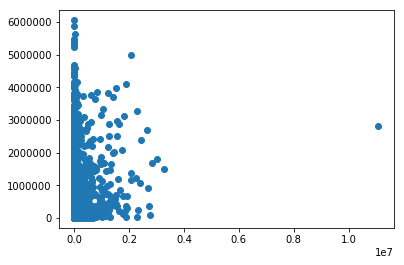

In [12]:
meanArtistFollowers = []
for playlist in playlists:
    artistFollowers = []
    for track in playlist.tracks:
        if track.artist1:
            artistFollowers.append(track.artist1.followers)
        if track.artist2:
            artistFollowers.append(track.artist2.followers)
        if track.artist3:
            artistFollowers.append(track.artist3.followers)
    meanArtistFollowers.append(np.mean(artistFollowers))
plt.scatter([playlist.followers for playlist in playlists], meanArtistFollowers)
plt.show()

In [15]:
allPlaylistGenres = []
for playlist in playlists:
    allPlaylistGenres.extend(playlist.genres)
print(len(set(allPlaylistGenres)))

# numTracks
# meanTrackPopularities
# sdTrackPopularities
# meanArtistPopularities
# sdArtistPopularities
# meanArtistFollowers
# sdArtistFollowers
# meanArtistViews
# sdArtistViews
# followers
def flattenPlaylist(playlist):
    trackPopularities = []
    artistPopularities = []
    artistFollowers = []
    artistViews = []
    
    for track in playlist.tracks:
        trackPopularities.append(track.popularity)
        if track.artist1:
            artistPopularities.append(track.artist1.popularity)
            artistFollowers.append(track.artist1.followers)
            artistViews.append(track.artist1.views)
        if track.artist2:
            artistPopularities.append(track.artist2.popularity)
            artistFollowers.append(track.artist2.followers)
            artistViews.append(track.artist2.views)
        if track.artist3:
            artistPopularities.append(track.artist3.popularity)
            artistFollowers.append(track.artist3.followers)
            artistViews.append(track.artist3.views)
    return [len(playlist.tracks), np.mean(trackPopularities), np.std(trackPopularities), np.mean(artistPopularities), np.std(artistPopularities), np.mean(artistFollowers), np.std(artistFollowers), np.mean(artistViews), np.std(artistViews), playlist.followers]
            

headers = ['num_tracks', 'mean_track_popularities', 'std_track_popularities', 'mean_artist_popularities', 'std_artist_popularities', 'mean_artist_followers', 'std_artist_followers', 'mean_artist_views', 'std_artist_views', 'followers']
flattened = [flattenPlaylist(playlist) for playlist in playlists]
df = pd.DataFrame(flattened, columns=headers)

msk = np.random.rand(len(df)) < 0.75
data_train = df[msk]
data_test = df[~msk]

ytrain = data_train.iloc[:,-1]
Xtrain = data_train.drop(data_test.columns[len(data_test.columns)-1], axis=1)

ytest = data_test.iloc[:,-1]
Xtest = data_test.drop(data_test.columns[len(data_test.columns)-1], axis=1)

data_train.describe()

399


,num_tracks,mean_track_popularities,std_track_popularities,mean_artist_popularities,std_artist_popularities,mean_artist_followers,std_artist_followers,mean_artist_views,std_artist_views,followers
count,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1.081000e+03,1.081000e+03,1.081000e+03,1.081000e+03,1.081000e+03
mean,52.900093,38.303774,15.778866,58.501832,13.160157,7.800852e+05,1.090199e+06,1.151834e+06,1.603347e+06,2.004384e+05
std,25.964634,16.934206,5.812382,16.477135,4.678025,1.026206e+06,1.193923e+06,1.286010e+06,1.405321e+06,5.217126e+05
min,3.000000,0.000000,0.000000,8.261682,0.000000,6.574766e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,30.000000,26.520000,11.879663,48.578313,10.306664,8.022208e+04,1.667691e+05,2.002164e+05,4.443029e+05,1.239000e+03
50%,50.000000,39.418605,16.521852,59.726190,12.890308,3.520700e+05,6.002185e+05,6.599302e+05,1.166451e+06,2.718700e+04
75%,70.000000,49.195122,20.031198,70.200000,15.745654,1.045773e+06,1.604130e+06,1.685537e+06,2.549006e+06,1.682770e+05
max,100.000000,90.300000,34.226306,93.818182,37.446410,6.050277e+06,5.189948e+06,1.168228e+07,7.067183e+06,1.108252e+07


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [14]:
alphas = [.0001, .001, .005, 0.01, .05, .075, .1, .3, .5, 1.0, 10.0, 100, 1000]
ridge = RidgeCV(fit_intercept=True, normalize=True, alphas=alphas, cv=5)
ridge.fit(Xtrain, ytrain)
print(ridge.alpha_)
print(ridge.predict(Xtest))

lasso = LassoCV(fit_intercept=True, normalize=True, alphas=alphas, cv=5)
lasso.fit(Xtrain, ytrain)
print(lasso.score(Xtest, ytest))
print(lasso.alpha_)

rfe = RFE(ridge, 5)
rfe.fit(Xtrain, ytrain)
print(rfe.support_)
print(rfe.ranking_)

0.1
[ 460436.01037767  655799.6638107   434330.35905267  488938.90896957
  246789.78305713  299663.49777662  524764.94916904  314983.18644583
  394147.60318714  498381.41969894  358157.4299966   227861.30639577
  211281.78475621  279207.86750478  244065.80577402  434911.83307247
  551773.29327837  301944.78947518  312199.95407412  613719.33168174
  631007.63038484  295146.13363783  398674.02659173  387841.61079921
  586437.50704703  258333.54479024  436538.74446495  209007.91725935
  408953.38906542  257806.5869904   294083.75416207  237369.29484234
   71479.14859979   22107.8345784     7693.43916564   41255.70506323
  392605.79412262   34098.61504064  158911.11926089  262169.08467829
  285337.76148918  515680.5944504   424394.9525459   237123.14744713
  412752.92766791  -64804.53751831 -103508.29580605  201400.35864192
  139574.40686605  111471.00787328  162832.35325678  250769.65411983
  -87647.95779084   38461.73334756  224220.98046617  220929.48638073
  256966.01930083  181574.1769

['brostep', 'environmental', 'electro house', 'alternative metal', 'contemporary country', 'dancehall', 'country blues', 'fingerstyle', 'latin', 'hip pop', 'viral pop', 'gospel', 'indie poptimism', 'trap music', 'pop', 'indie pop', 'reggae rock', 'deep pop r&b', 'bass trap', 'progressive house', 'deep big room', 'roots reggae', 'alternative rock', 'anthem emo', 'ccm', 'singer-songwriter', 'punk', 'fluxwork', 'chamber pop', 'contemporary post-bop', 'italian arena pop', 'indie folk', 'pop rock', 'britpop', 'vapor soul', 'electronic trap', 'hawaiian', 'tech house', 'trap francais', 'big room', 'deep dutch hip hop', 'indie jazz', 'house', 'focus', 'post-teen pop', 'deep indie r&b', 'rap', 'cool jazz', 'deep german hip hop', 'rap metal', 'tropical house', 'post-screamo', 'edm', 'deep hardstyle', 'motown', 'hip hop', 'skate punk', 'chillhop', 'r&b']
[366059.66666666669, 245194.0, 656439.25, 220264.29411764705, 244384.35000000001, 214586.5, 405568.0, 476225.0, 381024.25, 1247438.0, 897124.666

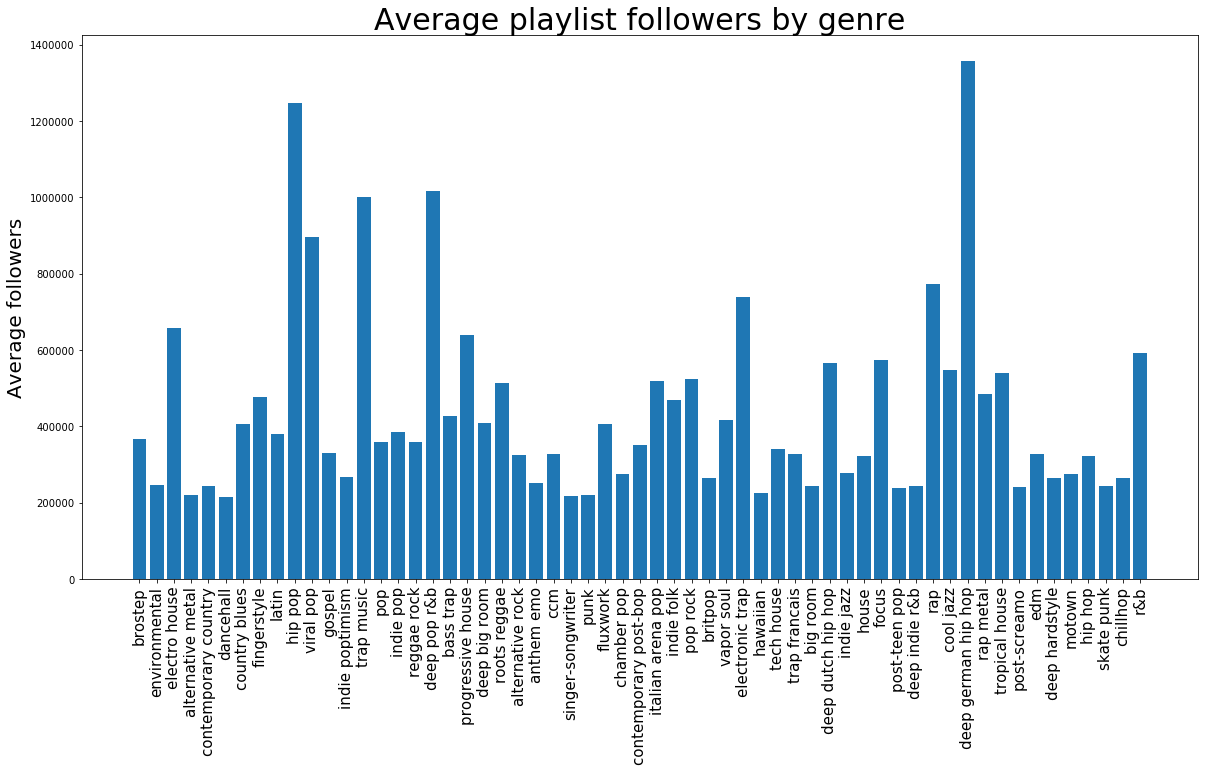

In [11]:
for playlist in playlists:
    genres = []
    for track in playlist.tracks:
        if track.artist1:
            genres.extend(track.artist1.genres)
        if track.artist2:
            genres.extend(track.artist2.genres)
        if track.artist3:
            genres.extend(track.artist3.genres)
    genres = Counter(genres)
    # Empty string is getting in here. need to figure that out
    del genres['']          
    common_count = genres.most_common(1)
    if len(common_count) > 0:
        common_count = common_count[0][1]
        commonest_genres = []
        for key, value in dict(genres).items():
            if value == common_count:
                commonest_genres.append(key)
        if len(commonest_genres) == 1:
            playlist.bestGenre = str(commonest_genres[0])
        else:
            for x in commonest_genres:
                if x not in genresByPopularity:
                    genresByPopularity.append(x)
            indexes_by_popularity = [genresByPopularity.index(x) for x in commonest_genres]
            playlist.bestGenre = commonest_genres[np.argmin(indexes_by_popularity)]

genrePopularities = {}
for playlist in playlists:
    if playlist.bestGenre not in genrePopularities:
        genrePopularities[playlist.bestGenre] = []
        
    genrePopularities[playlist.bestGenre].append(playlist.followers)

genres = []
followers = []
for key, value in genrePopularities.items():
    if np.mean(value) > 200000:
        genres.append(key)
        followers.append(np.mean(value))
print(genres)
print(followers)
plt.figure(figsize=(20,10))
plt.ylabel("Average followers", fontsize=20)
plt.bar(list(range(len(genres))), followers, align='center')
plt.xticks(list(range(len(genres))), genres, rotation='vertical', fontsize=15)
plt.title("Average playlist followers by genre", fontsize=30)
plt.show()


In [22]:
def distance(genre1, genre2, unpopular_missed_penalty=0):
    if genre1 == genre2:
        return 0
    
    # Take the set of genres that genre1 is in, and the set that genre2 is in
    # Compute the distance as a percentage that they have in common
    opportunities = 0
    missed = 0
    mostPopular = genre2 if genres.index(genre1) > genres.index(genre2) else genre1
    leastPopular = genre1 if genres.index(genre1) > genres.index(genre2) else genre2
    for playlist in playlists:
        if leastPopular in playlist.genres:
            opportunities += 1
            if mostPopular not in playlist.genres:
                missed += 1
        
        elif mostPopular in playlist.genres and leastPopular not in playlist.genres:
            # Shouldn't count against the score quite as much
            missed += unpopular_missed_penalty
            opportunities += unpopular_missed_penalty
                
    return float(missed / opportunities);

# 0 = when genre1 shows up, genre2 does also, and vice versa
# 1 = they do not show up in the same playlists

def distance_between_groups(group1, group2, unpopular_missed_penalty=0):
    avgs = []
    for genre1 in group1:
        for genre2 in group2:
            avgs.append(distance(genre1, genre2, unpopular_missed_penalty))
    return np.mean(avgs)

In [24]:
#dbscan = DBSCAN(eps=0.1, min_samples=3, metric='precomputed')
#dbscan.fit(distance_matrix)
#print(dbscan.labels_)
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import FeatureAgglomeration

from collections import defaultdict

def print_labels_with_vals(labels, groups):
    labels_dict = dict()
    for i in range(len(labels)):
        if str(labels[i]) not in labels_dict:
            labels_dict[str(labels[i])] = []
        labels_dict[str(labels[i])].extend(groups[i])

    # These shouldn't be here. I don't know why they're here with min group size = 1
    unsorted = []
    if '-1' in labels_dict:
        unsorted = labels_dict['-1']
        del labels_dict['-1']
    return_groups = [value for key, value in labels_dict.items()]
    if unsorted:
        if unsorted[0] == list:
            return_groups.extend(unsorted)
        else:
            return_groups.extend([[item] for item in unsorted])
    print("LENGTH OF RETURN IS: ")
    print(len(return_groups))
    return return_groups


# Compute distance matrix for genres
playlistGenres = []
for playlist in playlists:
    playlistGenres.extend(playlist.genres)
playlistGenres = list(set(playlistGenres))

distance_matrix = []
for genre1 in playlistGenres:
    row = []
    for genre2 in playlistGenres:
        row.append(distance(genre1, genre2, .1))
    distance_matrix.append(row)

eps_vals = [.001, .001, .005, .0075, .01, .05, .075, .1, .12, .15, .2]
for eps_val in eps_vals:
    dbscan = DBSCAN(eps=eps_val, min_samples=1, metric='precomputed', algorithm='brute')
    dbscan.fit(distance_matrix)
    score = silhouette_score(distance_matrix, dbscan.labels_, metric='precomputed')
    print(str(eps_val)+" : "+str(score))
    

In [26]:
from itertools import chain

def match_groups(groups, eps, missed_penalty, big_groups_limit=6):
    
    big_groups = []
    little_groups = []
    for group in groups:
        if len(group) > big_groups_limit:
            big_groups.append(group)
        else:
            little_groups.append(group)
            
    distances = []
    print(len(little_groups))
    print(len(big_groups))
    
    for genre_group1 in little_groups:
        row = []
        for genre_group2 in little_groups:
            row.append(distance_between_groups(genre_group1, genre_group2, missed_penalty))
        distances.append(row)

    dbscan = DBSCAN(eps=eps, min_samples=1, metric='precomputed', algorithm='auto')
    dbscan.fit(distances)
    groups = print_labels_with_vals(dbscan.labels_, little_groups)
    groups.extend(big_groups)

    return groups

distance_matrix = []
for genre1 in playlistGenres:
    row = []
    for genre2 in playlistGenres:
        row.append(distance(genre1, genre2, 0))
    distance_matrix.append(row)

# DB scan mostly does a good job, but splits some groups into too large of a category
# and others cannot be sufficiently grouped
print("PASS 1")
dbscan = DBSCAN(eps=.1, min_samples=1, metric='precomputed', algorithm='brute')
dbscan.fit(distance_matrix)


PASS 1


DBSCAN(algorithm='brute', eps=0.1, leaf_size=30, metric='precomputed',
    metric_params=None, min_samples=1, n_jobs=1, p=None)

In [ ]:
label_dict = defaultdict(list)
for i in list(range(dbscan.labels_)):
    label_dict[str(dbscan.labels_[i])].append(playlistGenres[i]) 
groups = [value for key, value in label_dict.items()]
print(len(groups))
for group in groups:
    print(group)

In [173]:
print("PASS 2")
print(len(groups))
groups2 = match_groups(groups, .5, 0)
print("LEN GROUPS 2:")
print(len(groups2))
for group in groups2:
    print(group)



PASS 2
124
109
15
LABELS
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31  2 32 15 33 15 34 35 36  2 37 38 39  2 40 41 42 30 43
 44 45 46 15 47 48 49 15 50 51  2 52 53 54 55 56  2 57 58 59 60 15 61 62 30
 15 63  2 44  2 64 65 24 62 15 65 66 67 68 69 70  2 71 72 15  2 15 73 70 54
 74 75 76 15 77 78 79 80 81]
Lengths of things
109
109
Adding new label: 0
Adding new label: 1
Adding new label: 2
Adding new label: 3
Adding new label: 4
Adding new label: 5
Adding new label: 6
Adding new label: 7
Adding new label: 8
Adding new label: 9
Adding new label: 10
Adding new label: 11
Adding new label: 12
Adding new label: 13
Adding new label: 14
Adding new label: 15
Adding new label: 16
Adding new label: 17
Adding new label: 18
Adding new label: 19
Adding new label: 20
Adding new label: 21
Adding new label: 22
Adding new label: 23
Adding new label: 24
Adding new label: 25
Adding new label: 26
Adding new label: 27
Adding new label: 28
Adding new label:

In [178]:
groups3 = match_groups(groups2, .5, 0)
print("LEN GROUPS 3:")
print(len(groups3))
for group in groups3:
    print(group)


80
17
LENGTH OF RETURN IS: 
80
LEN GROUPS 3:
97
['environmental', 'sleep']
['screamo', 'post-screamo']
['pop christmas']
['gypsy jazz', 'jazz bass', 'jazz fusion', 'jazz funk']
['voidgaze', 'pagan black metal', 'black metal']
['hard rock']
['jazz']
['swedish pop', 'europop', 'eurovision', 'swedish folk pop', 'swedish eurodance']
['hardcore techno']
['indie anthem-folk']
['classic funk rock', 'disco', 'soul']
['progressive uplifting trance', 'trance', 'progressive house']
['r&b', 'urban contemporary']
['bass trip', 'fluxwork', 'ambient idm']
['contemporary jazz', 'dark jazz', 'fourth world']
['djent', 'jazz metal', 'neo classical metal', 'progressive metal']
['vapor twitch', 'deep indie r&b']
['gothic metal', 'symphonic metal', 'power metal']
['tropical', 'reggaeton', 'latin', 'latin jazz', 'trap latino', 'latin pop']
['underground hip hop']
['canadian pop', 'indie r&b', 'footwork', 'escape room']
['theme']
['new wave pop', 'dance rock']
['art rock']
['native american']
['world christma

In [ ]:
groups = []

def playlistToGenreGroup(playlist):
    for i in range(len(groups)):
        if playlist.genres[0] in group:
            # We found it!
            return i

def getTrackSimilarityScore(playlist):
    for track in playlist.tracks:
        


        
playlistsToTest = []
for playlist in playlists:
    playlist.genreGroup = playlistToGenreGroup(playlist)
    if playlist.genreGroup:
        playlistsToTest.append(playlist)
        

for playlist in playlists:
    playlist.similarityScore = getTrackSimilarityScore(playlist)
        

        

    